## Statistical and Machine Learning Approaches for Marketing
### Individual Project
Fernando Delgado

## Initiation

In [4]:
#Working Directory
wd = "C:/Users/fdelgado/OneDrive - IESEG/Documents/01. IESEG/13. Statistical and Machine Learning Approaches/Individual_Project_Fernando"

In [2]:
#Data manipulation
import pandas as pd 
import numpy as np
from numpy import arange
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#Experimental setup
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

#Scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

#Other 
import shutup; shutup.please()

## 1. Data Summary

#### 1.1 Read and print data

In [4]:
#Load Data
df = pd.read_csv(wd + '/data/raw/credit_default_train.csv')

In [5]:
#Check data types
print(df.dtypes.value_counts())
df.head()

float64    23
int64       2
dtype: int64


,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,18895,70000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,...,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,25102,390000.0,2.0,2.0,2.0,26.0,2.0,2.0,2.0,0.0,...,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,28867,60000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,...,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,1842,140000.0,2.0,2.0,1.0,55.0,0.0,0.0,0.0,0.0,...,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,3371,50000.0,1.0,1.0,2.0,29.0,2.0,2.0,2.0,0.0,...,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1


#### 1.2 Create a list of column names

In [6]:
#Split Predictor and Target
id_var = ['cust_id']
target = ['default.payment.next.month']
predictors = [v for v in df.columns if v not in id_var + target]

#### 1.3 Check the distribution

In [7]:
# By number
print(df[target].value_counts())

# By percentage
print(df[target].value_counts(normalize=True))

default.payment.next.month
0                             15586
1                              4414
dtype: int64
default.payment.next.month
0                             0.7793
1                             0.2207
dtype: float64


#### 1.4 Train/Test Split

In [8]:
random.seed = 1
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(df[id_var+predictors], 
    df[target], test_size = 0.2, stratify = df[target])

#Check dimensions
print('Train split size: ', X_train.shape)
print('Test split size: ', X_test.shape)

Train split size:  (16000, 24)
Test split size:  (4000, 24)


## 2. Processing Data

#### 2.1 Error Correction

#### Missing Values

In [9]:
# Check missing value
print('Train - # NA of num vars:', X_train[predictors].isna().sum().sum())
print('Train - # NA of num vars:', X_test[predictors].isna().sum().sum())

Train - # NA of num vars: 3585
Train - # NA of num vars: 863


We create categoricals in order to create dummy variables later

Education

In [10]:
#Train
X_train['EDUCATION'].fillna(value='missing', inplace=True) 

X_train['EDUCATION'] = np.where(X_train['EDUCATION'] == 1, 'graduate',
    np.where(X_train['EDUCATION'] == 2, 'university', 
        np.where(X_train['EDUCATION'] == 3, 'highschool', 
            np.where(X_train['EDUCATION']=='missing', 'missing', 'other'))))

#Test
X_test['EDUCATION'].fillna(value='missing', inplace=True) 

X_test['EDUCATION'] = np.where(X_test['EDUCATION'] == 1, 'graduate',
    np.where(X_test['EDUCATION'] == 2, 'university', 
        np.where(X_test['EDUCATION'] == 3, 'highschool', 
            np.where(X_test['EDUCATION']=='missing', 'missing', 'other'))))

Sex

In [11]:
#Train
X_train['SEX'] = np.where(X_train['SEX'] == 1, 'male', 
    np.where(X_train['SEX'] == 2, 'female', 'missing'))

#Test
X_test['SEX'] = np.where(X_test['SEX'] == 1, 'male', 
    np.where(X_test['SEX'] == 2, 'female', 'missing'))

Marriage

In [12]:
#Train
X_train['MARRIAGE'].fillna(value='missing', inplace=True) 

X_train['MARRIAGE'] = np.where(X_train['MARRIAGE'] == 1, 'married', 
    np.where(X_train['MARRIAGE'] == 2, 'single', 
        np.where(X_train['MARRIAGE'] == 'missing', 'missing', 'other')))

#Test
X_test['MARRIAGE'].fillna(value='missing', inplace=True) 

X_test['MARRIAGE'] = np.where(X_test['MARRIAGE'] == 1, 'married', 
    np.where(X_test['MARRIAGE'] == 2, 'single', 
        np.where(X_test['MARRIAGE'] == 'missing', 'missing', 'other')))
        

Age: Fill with mean

In [13]:
#Train
X_train['missing_age'] = np.where(X_train['AGE'].isnull(), 1, 0)

#input mean
age_mean = X_train['AGE'].mean()
X_train['AGE'].fillna(value=age_mean, inplace=True)

#Test: we fill with the train mean 
X_test['missing_age'] = np.where(X_test['AGE'].isnull(), 1, 0)
X_test['AGE'].fillna(value=age_mean, inplace=True)

Limit Bal: fill with mode

In [14]:
#Train
X_train['missing_limit_bal'] = np.where(X_train['LIMIT_BAL'].isnull(), 1, 0)

limit_mode = X_train['LIMIT_BAL'].mode()[0]
X_train['LIMIT_BAL'].fillna(value=limit_mode, inplace=True) 

#test
X_test['missing_limit_bal'] = np.where(X_test['LIMIT_BAL'].isnull(), 1, 0)
X_test['LIMIT_BAL'].fillna(value=limit_mode, inplace=True) 

Other Columns

In [15]:
#Create column list to loop
column_list_train = X_train.columns.values
column_list_test  = X_test.columns.values

#If column has null, then create missing tracker and fill NA with 0

#Train
for c in column_list_train:
    if X_train[c].isna().sum() > 0:
        X_train['missing_' + str(c)] = np.where(X_train[c].isnull(), 1, 0)
        X_train[c].fillna(0, inplace=True) 

#Test
for c in column_list_test:
    if X_test[c].isna().sum() > 0:
        X_test['missing_' + str(c)] = np.where(X_test[c].isnull(), 1, 0)
        X_test[c].fillna(0, inplace=True) 

In [16]:
#Validation
print('Train null values: ', X_train.isna().sum().sum())
print('Test null values: ', X_train.isna().sum().sum())

Train null values:  0
Test null values:  0


#### 2.2 Outlier Treatment

We check for outliers but decide not to treat them

In [17]:
num_vars = ['LIMIT_BAL', 'AGE','BILL_AMT1', 'BILL_AMT2',
    'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ] 

cat_vars = ['MARRIAGE','EDUCATION','SEX', 
    'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [18]:
#This code is taken from the preprocess example from professor Minh
for v in num_vars:
    # Calculate the boundaries on train [mean-3*sd, mean+3*sd]
    mu = np.mean(X_train[v])
    sd = np.std(X_train[v])
    lower = mu - 3*sd
    upper = mu + 3*sd
    # Check outliers using the boundaries
    train_out = (X_train[v] < lower) | (X_train[v] > upper)
    test_out = (X_test[v] < lower) | (X_test[v] > upper)
    if np.sum(train_out) + np.sum(test_out) > 0:
        print(v, "has # outliers on train, test :",
              np.sum(train_out), "[", np.round(100*np.mean(train_out), 2), "% ]",
              np.sum(test_out), "[", np.round(100*np.mean(test_out), 2), "% ]")

LIMIT_BAL has # outliers on train, test : 77 [ 0.48 % ] 15 [ 0.38 % ]
AGE has # outliers on train, test : 78 [ 0.49 % ] 11 [ 0.27 % ]
BILL_AMT1 has # outliers on train, test : 374 [ 2.34 % ] 82 [ 2.05 % ]
BILL_AMT2 has # outliers on train, test : 365 [ 2.28 % ] 86 [ 2.15 % ]
BILL_AMT3 has # outliers on train, test : 348 [ 2.17 % ] 87 [ 2.17 % ]
BILL_AMT4 has # outliers on train, test : 353 [ 2.21 % ] 95 [ 2.38 % ]
BILL_AMT5 has # outliers on train, test : 338 [ 2.11 % ] 95 [ 2.38 % ]
BILL_AMT6 has # outliers on train, test : 341 [ 2.13 % ] 92 [ 2.3 % ]
PAY_AMT1 has # outliers on train, test : 227 [ 1.42 % ] 48 [ 1.2 % ]
PAY_AMT2 has # outliers on train, test : 151 [ 0.94 % ] 39 [ 0.98 % ]
PAY_AMT3 has # outliers on train, test : 197 [ 1.23 % ] 43 [ 1.08 % ]
PAY_AMT4 has # outliers on train, test : 225 [ 1.41 % ] 69 [ 1.72 % ]
PAY_AMT5 has # outliers on train, test : 225 [ 1.41 % ] 56 [ 1.4 % ]
PAY_AMT6 has # outliers on train, test : 244 [ 1.52 % ] 46 [ 1.15 % ]


### 2.3 Feature Creation and Encoding

In [19]:
#we create categoricals from pay
pay_columns = ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

#Train
for c in pay_columns:
    X_train[c] = np.where(X_train[c] < -1, 'very_early', 
        np.where(X_train[c] == -1, 'early', 
            np.where(X_train[c] > 0, 'late',
                np.where(X_train[c] > 2, 'very_late', 'normal'))))
#Test
for c in pay_columns:
    X_test[c] = np.where(X_test[c] < -1, 'very_early', 
        np.where(X_test[c] == -1, 'early', 
            np.where(X_test[c] > 0, 'late',
                np.where(X_test[c] > 2, 'very_late', 'normal'))))

In [20]:
#Train
X_train = pd.get_dummies(X_train, columns = cat_vars, drop_first= True)

#Test
X_test = pd.get_dummies(X_test, columns = cat_vars, drop_first= True)

In [21]:
#Age Column 
bins = [20, 30, 40, 50, 60, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60+']

#Train
X_train['agerange'] = pd.cut(X_train.AGE, bins, labels = labels, include_lowest = True) 
X_train = pd.get_dummies(X_train, columns = ['agerange'])
X_train = X_train.drop(columns=['AGE'])

#Test
X_test['agerange'] = pd.cut(X_test.AGE, bins, labels = labels, include_lowest = True) 
X_test = pd.get_dummies(X_test, columns = ['agerange'])
X_test = X_test.drop(columns=['AGE'])

#### 2.4 Data Normalization

In [22]:
#remove age form numericals
num_vars = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
    'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ] 

In [23]:
for v in num_vars:
    # Build the normalizer on train
    scaler = MinMaxScaler().fit(X_train[[v]])
    # Apply on train, test
    X_train[v] = scaler.transform(X_train[[v]])
    X_test[v] = scaler.transform(X_test[[v]])

Droping constant and low variance variables

In [24]:
predictors = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'missing_age', 'missing_limit_bal',
       'missing_PAY_0', 'missing_PAY_2', 'missing_PAY_3', 'missing_PAY_4',
       'missing_PAY_5', 'missing_PAY_6', 'missing_BILL_AMT1',
       'missing_BILL_AMT2', 'missing_BILL_AMT3', 'missing_BILL_AMT4',
       'missing_BILL_AMT5', 'missing_BILL_AMT6', 'missing_PAY_AMT1',
       'missing_PAY_AMT2', 'missing_PAY_AMT3', 'missing_PAY_AMT4',
       'missing_PAY_AMT5', 'missing_PAY_AMT6', 'MARRIAGE_missing',
       'MARRIAGE_other', 'MARRIAGE_single', 'EDUCATION_highschool',
       'EDUCATION_missing', 'EDUCATION_other', 'EDUCATION_university',
       'SEX_male', 'SEX_missing', 'PAY_0_late', 'PAY_0_normal',
       'PAY_0_very_early', 'PAY_2_late', 'PAY_2_normal', 'PAY_2_very_early',
       'PAY_3_late', 'PAY_3_normal', 'PAY_3_very_early', 'PAY_4_late',
       'PAY_4_normal', 'PAY_4_very_early', 'PAY_5_late', 'PAY_5_normal',
       'PAY_5_very_early', 'PAY_6_late', 'PAY_6_normal', 'PAY_6_very_early',
       'agerange_20-29', 'agerange_30-39', 'agerange_40-49', 'agerange_50-59',
       'agerange_60+']

In [25]:
# Detect constant vars
sel = VarianceThreshold(0)  # Var = 0 by default
sel.fit(X_train[predictors])
const_vars = [predictors[i] for i in np.where(sel.variances_ == 0)[0]]
predictors = [v for v in predictors if v not in const_vars]

# Drop from train, test
print('Drop # constant vars :', len(const_vars))
X_train = X_train.drop(const_vars, axis=1)
X_test = X_test.drop(const_vars, axis=1)

Drop # constant vars : 0


#### 2.5 Drop Duplicates

In [26]:
# Count the duplicated vars
dup_vars = X_train[predictors].T.duplicated()
print('# duplicated vars :', dup_vars.sum())

# duplicated vars : 0


#### 2.6 Export data file

In [27]:
#Readd target to basetable
X_train['target'] = y_train
X_test['target'] = y_test

print(X_train.shape)
print(X_test.shape)

(16000, 67)
(4000, 67)


In [28]:
#Save to pickle format
X_train.to_pickle(wd + "/data/final/train_processed.pkl")
X_test.to_pickle(wd + "/data/final/test_processed.pkl")

## 3. Feature Selection

In [5]:
train = pd.read_pickle(wd + "/data/final/train_processed.pkl")
test = pd.read_pickle(wd + "/data/final/test_processed.pkl")

In [33]:
#Check dimensions
print('Train split size: ', train.shape)
print('Test split size: ', test.shape)

Train split size:  (16000, 67)
Test split size:  (4000, 67)


In [34]:
train.head()

,cust_id,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_very_early,PAY_6_late,PAY_6_normal,PAY_6_very_early,agerange_20-29,agerange_30-39,agerange_40-49,agerange_50-59,agerange_60+,target
11703,22008,0.353535,0.434849,0.351618,0.182029,0.399175,0.333918,0.456039,0.021947,0.005313,...,0,0,1,0,0,1,0,0,0,0
7726,22409,0.353535,0.147462,0.066220,0.036152,0.161214,0.081566,0.262055,0.000000,0.000521,...,0,0,0,0,0,1,0,0,0,1
12975,7799,0.040404,0.241429,0.165035,0.096342,0.261520,0.194314,0.350817,0.000000,0.002281,...,0,1,0,0,1,0,0,0,0,0
13781,16331,0.050505,0.201028,0.125015,0.070797,0.187545,0.098135,0.285114,0.006535,0.001187,...,0,0,1,0,0,0,1,0,0,1
11560,19225,0.010101,0.163653,0.084830,0.035417,0.178425,0.092768,0.262600,0.002376,0.000095,...,0,0,0,0,0,0,1,0,0,0


In [6]:
# Create several lists to handle variables
id_var = ['cust_id']
target_var = ['target']
predictors = [v for v in train.columns if v not in id_var + target_var]

In [7]:
def FisherScore(bt, target_var, predictors):
    """
    This function calculate the Fisher score of a variable.

    Ref:
    ---
    Verbeke, W., Dejaeger, K., Martens, D., Hur, J., & Baesens, B. (2012). New insights
    into churn prediction in the telecommunication sector: A profit driven data mining
    approach. European Journal of Operational Research, 218(1), 211-229.
    """
    
    # Get the unique values of dependent variable
    target_var_val = bt[target_var].unique()
    # Calculate FisherScore for each predictor
    predictor_FisherScore = []
    for v in predictors:
        fs = np.abs(np.mean(bt.loc[bt[target_var]==target_var_val[0], v]) - np.mean(bt.loc[bt[target_var]==target_var_val[1], v])) / \
             np.sqrt(np.var(bt.loc[bt[target_var]==target_var_val[0], v]) + np.var(bt.loc[bt[target_var]==target_var_val[1], v]))
        predictor_FisherScore.append(fs)
    return predictor_FisherScore

In [8]:
# Calculate Fisher Score for all variable
fs = FisherScore(train, target_var[0], predictors)
fs_df = pd.DataFrame({"predictor":predictors, "fisherscore":fs})
fs_df = fs_df.sort_values('fisherscore', ascending=False)
fs_df.head()

,predictor,fisherscore
42,PAY_0_late,0.590607
45,PAY_2_late,0.509229
48,PAY_3_late,0.440814
51,PAY_4_late,0.410299
54,PAY_5_late,0.390907


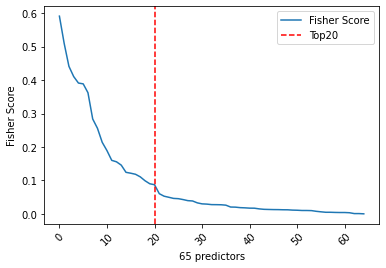

In [9]:
# Visualize the Fisher Score
plt.plot(fs_df['fisherscore'].values.squeeze())
plt.axvline(x=20, linestyle='dashed', color='red')
plt.xticks(rotation=45)
plt.xlabel(str(fs_df.shape[0]) + ' predictors')
plt.ylabel('Fisher Score')
plt.legend(['Fisher Score', 'Top20'])
plt.show()

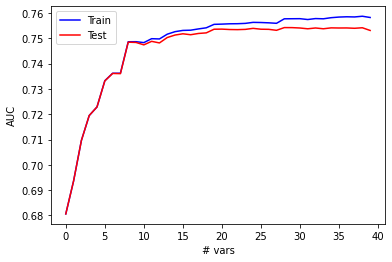

In [10]:
# Check how AUC change when add more variables: Top n vars
fs_scores = []
top_n_vars = 40
for i in range(1, top_n_vars+1):
    if i % 100 == 0: print('Added # top vars :', i)
    top_n_predictors = fs_df['predictor'][:i]
    clf = LogisticRegression()
    fs_scores.append(cross_validate(clf, train[top_n_predictors], train[target_var].values.squeeze(),
                                    scoring='roc_auc', cv=5, verbose=0, n_jobs=-1, return_train_score=True))

# How the AUC curve looks like when adding top vars
plt.plot([s['train_score'].mean() for s in fs_scores], color='blue')
plt.plot([s['test_score'].mean() for s in fs_scores], color='red')
plt.xlabel('# vars')
plt.ylabel('AUC')
plt.legend(['Train', 'Test'])
plt.show()

In [11]:
# Select the top variables based on Fisher Score
n_top_fs_vars = 35  # Top FS vars
top_fs_vars = fs_df['predictor'].values[:n_top_fs_vars]
print("Selected # vars :", len(top_fs_vars))
top_fs_vars

Selected # vars : 35


array(['PAY_0_late', 'PAY_2_late', 'PAY_3_late', 'PAY_4_late',
       'PAY_5_late', 'PAY_0_normal', 'PAY_6_late', 'PAY_2_normal',
       'LIMIT_BAL', 'PAY_3_normal', 'PAY_4_normal', 'PAY_6_normal',
       'PAY_5_normal', 'PAY_AMT1', 'PAY_AMT4', 'PAY_AMT2',
       'PAY_0_very_early', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_other',
       'PAY_AMT3', 'EDUCATION_university', 'PAY_2_very_early',
       'PAY_3_very_early', 'SEX_male', 'agerange_30-39',
       'PAY_4_very_early', 'PAY_5_very_early', 'BILL_AMT1',
       'MARRIAGE_single', 'BILL_AMT3', 'EDUCATION_highschool',
       'missing_PAY_3', 'PAY_6_very_early', 'BILL_AMT2'], dtype=object)

## 4. Modeling

### 4.1 Logistic Regression

In [20]:
random.seed=1

In [13]:
#Parameters
parameters={"C":np.logspace(-4, 4, 50), "penalty":["l1", "l2"]}# l1 lasso l2 ridge
#Setup model
lr=LogisticRegression()
#Setup Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Grid Search
lr_cv=RandomizedSearchCV(lr, parameters, cv=3)
#Cross-validate model
scores = cross_val_score(lr_cv, train[top_fs_vars], train['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.808 (0.007)


In [19]:
results = lr_cv.fit(train[top_fs_vars],train['target'])
print('Config: %s' % results.best_params_)

Config: {'penalty': 'l2', 'C': 2222.996482526191}


In [21]:
lr=LogisticRegression(penalty = 'l2', C = 2222.996482526191).fit(train[top_fs_vars],train['target'])

In [22]:
#Train
result = {}
predictions   = lr.predict(train[top_fs_vars])
probabilities = pd.DataFrame(lr.predict_proba(train[top_fs_vars]))[1]
accuracy      = accuracy_score(train['target'], predictions)
auc           = roc_auc_score(np.array(train['target']),np.array(probabilities))
print("Train completed.")
result["LogisticRegression"] = {"Train_Accuracy":accuracy, "Train_AUC":auc}
train_perf = pd.DataFrame(result).transpose()

#Test
result = {}
predictions   = lr.predict(test[top_fs_vars])
probabilities = pd.DataFrame(lr.predict_proba(test[top_fs_vars]))[1]
accuracy      = accuracy_score(test['target'], predictions)
auc           = roc_auc_score(np.array(test['target']),np.array(probabilities))
print("Test completed.")
result["LogisticRegression"] = {"Test_Accuracy":accuracy,"Test_AUC":auc}
test_perf = pd.DataFrame(result).transpose()

#Compare Train and Test AUC
perf_lr = train_perf.merge(test_perf, left_index=True, right_index=True)
perf_lr

Train completed.
Test completed.


,Train_AUC,Train_Accuracy,Test_AUC,Test_Accuracy
LogisticRegression,0.761012,0.809562,0.751847,0.81125


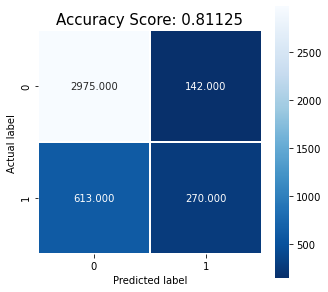

In [23]:
cm = metrics.confusion_matrix(test['target'], predictions)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

### 4.2 Linear Discriminant Analysis

In [24]:
lda = LinearDiscriminantAnalysis(solver='lsqr')
#Parameters
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
#Set up Crossvalidation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Grid Search
lda_cv = RandomizedSearchCV(lda, grid, scoring='accuracy', cv=3, n_jobs=-1)
#Cross-validate model
scores = cross_val_score(lda_cv, train[top_fs_vars], train['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.808 (0.006)


In [26]:
#Fit model
results = lda_cv.fit(train[top_fs_vars], train['target'])
# summarize 
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.810
Config: {'shrinkage': 0.02}


In [24]:
lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage = 0.02).fit(train[top_fs_vars], train['target'])

In [25]:
#Train
result = {}
predictions   = lda.predict(train[top_fs_vars])
probabilities = pd.DataFrame(lda.predict_proba(train[top_fs_vars]))[1]
accuracy      = accuracy_score(train['target'], predictions)
auc           = roc_auc_score(np.array(train['target']),np.array(probabilities))
print("Train completed.")
result["LDA"] = {"Train_Accuracy":accuracy,"Train_AUC":auc}
train_perf = pd.DataFrame(result).transpose()

#Test
result = {}
predictions   = lda.predict(test[top_fs_vars])
probabilities = pd.DataFrame(lda.predict_proba(test[top_fs_vars]))[1]
accuracy      = accuracy_score(test['target'], predictions)
auc           = roc_auc_score(np.array(test['target']),np.array(probabilities))
print("Test completed.")
result["LDA"] = {"Test_Accuracy":accuracy,"Test_AUC":auc}
test_perf = pd.DataFrame(result).transpose()

#Compare Train and Test
perf_lda = train_perf.merge(test_perf, left_index=True, right_index=True)
perf_lda

Train completed.
Test completed.


,Train_AUC,Train_Accuracy,Test_AUC,Test_Accuracy
LDA,0.754352,0.810187,0.746116,0.81125


#### 4.3 Decision Tree

In [30]:
#setup parameters
param = {'criterion':['gini','entropy'],
    'max_depth':[5,10,15,20,30,50]}
#setup cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Grid Search
clf = RandomizedSearchCV(DecisionTreeClassifier(), param, scoring='accuracy', cv=3, n_jobs=-1)
#Cross-validate model
scores = cross_val_score(clf, train[top_fs_vars], train['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Accuracy: 0.806 (0.006)


In [31]:
results = clf.fit(train[top_fs_vars], train['target'])
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.806
Config: {'max_depth': 5, 'criterion': 'entropy'}


In [26]:
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5).fit(train[top_fs_vars], train['target'])

In [27]:
#Train
result = {}
predictions   = clf.predict(train[top_fs_vars])
probabilities = pd.DataFrame(clf.predict_proba(train[top_fs_vars]))[1]
accuracy      = accuracy_score(train['target'], predictions)
auc           = roc_auc_score(np.array(train['target']),np.array(probabilities))
print("Train completed.")
result['decisiontree'] = {"Train_Accuracy":accuracy,"Train_AUC":auc}
train_perf = pd.DataFrame(result).transpose()

#Test
result = {}
predictions   = clf.predict(test[top_fs_vars])
probabilities = pd.DataFrame(clf.predict_proba(test[top_fs_vars]))[1]
accuracy      = accuracy_score(test['target'], predictions)
auc           = roc_auc_score(np.array(test['target']),np.array(probabilities))
print("Test completed.")
result['decisiontree'] = {"Test_Accuracy":accuracy,"Test_AUC":auc}
test_perf = pd.DataFrame(result).transpose()

#Compare Train and Test
perf_clf = train_perf.merge(test_perf, left_index=True, right_index=True)
perf_clf

Train completed.
Test completed.


,Train_AUC,Train_Accuracy,Test_AUC,Test_Accuracy
decisiontree,0.76766,0.809125,0.74654,0.8065


#### 4.4 Random Forest

In [35]:
param = {'bootstrap': [True],
 'max_depth': [5, 10],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [400]}
#setup cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#Grid Search
rf_random = RandomizedSearchCV(RandomForestClassifier(), param, cv=3)
#Cross-validate model
scores = cross_val_score(rf_random, train[top_fs_vars], train['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.810 (0.003)


In [37]:
results = rf_random.fit(train[top_fs_vars], np.array(train['target']).ravel())
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.810
Config: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


In [28]:
rf = RandomForestClassifier(n_estimators= 400, min_samples_split = 10, min_samples_leaf = 1, max_depth = 10, bootstrap = True).fit(train[top_fs_vars], train['target'])

In [29]:
#Train
result = {}
predictions   = rf.predict(train[top_fs_vars])
probabilities = pd.DataFrame(rf.predict_proba(train[top_fs_vars]))[1]
accuracy      = accuracy_score(train['target'], predictions)
auc           = roc_auc_score(np.array(train['target']),np.array(probabilities))
print("Train completed.")
result['randomforest'] = {"Train_Accuracy":accuracy,"Train_AUC":auc}
train_perf = pd.DataFrame(result).transpose()

#Test
result = {}
predictions   = rf.predict(test[top_fs_vars])
probabilities = pd.DataFrame(rf.predict_proba(test[top_fs_vars]))[1]
accuracy      = accuracy_score(test['target'], predictions)
auc           = roc_auc_score(np.array(test['target']),np.array(probabilities))
print("Test completed.")
result['randomforest'] = {"Test_Accuracy":accuracy,"Test_AUC":auc}
test_perf = pd.DataFrame(result).transpose()

#Compare Train and Test
perf_rf = train_perf.merge(test_perf, left_index=True, right_index=True)
perf_rf

Train completed.
Test completed.


,Train_AUC,Train_Accuracy,Test_AUC,Test_Accuracy
randomforest,0.861502,0.844562,0.771493,0.8145


#### 4.5 Neural Network

In [12]:
grid = {
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01]
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

nn_random = RandomizedSearchCV(MLPClassifier(), grid, n_jobs=-1, cv=3)
# evaluate model
scores = cross_val_score(nn_random, train[top_fs_vars], train['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.808 (0.003)


In [13]:
results = nn_random.fit(train[top_fs_vars], np.array(train['target']).ravel())
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.808
Config: {'solver': 'sgd', 'alpha': 0.01}


In [30]:
nn = MLPClassifier(solver = 'sgd', alpha = 0.01).fit(train[top_fs_vars], train['target'])

In [31]:
#Train
result = {}
predictions   = nn.predict(train[top_fs_vars])
probabilities = pd.DataFrame(rf.predict_proba(train[top_fs_vars]))[1]
accuracy      = accuracy_score(train['target'], predictions)
auc           = roc_auc_score(np.array(train['target']),np.array(probabilities))
print("Train completed.")
result['NeuralNetwork'] = {"Train_Accuracy":accuracy,"Train_AUC":auc}
train_perf = pd.DataFrame(result).transpose()

#Test
result = {}
predictions   = nn.predict(test[top_fs_vars])
probabilities = pd.DataFrame(rf.predict_proba(test[top_fs_vars]))[1]
accuracy      = accuracy_score(test['target'], predictions)
auc           = roc_auc_score(np.array(test['target']),np.array(probabilities))
print("Test completed.")
result['NeuralNetwork'] = {"Test_Accuracy":accuracy,"Test_AUC":auc}
test_perf = pd.DataFrame(result).transpose()

#Compare Train and Test
perf_nn = train_perf.merge(test_perf, left_index=True, right_index=True)
perf_nn

Train completed.
Test completed.


,Train_AUC,Train_Accuracy,Test_AUC,Test_Accuracy
NeuralNetwork,0.861502,0.809813,0.771493,0.808


Overview

In [32]:
performance = pd.concat([perf_clf, perf_rf, perf_lda, perf_lr,  perf_nn]).sort_values(by="Test_Accuracy", ascending=False)
performance

,Train_AUC,Train_Accuracy,Test_AUC,Test_Accuracy
randomforest,0.861502,0.844562,0.771493,0.81450
LDA,0.754352,0.810187,0.746116,0.81125
LogisticRegression,0.761012,0.809562,0.751847,0.81125
NeuralNetwork,0.861502,0.809813,0.771493,0.80800
decisiontree,0.767660,0.809125,0.746540,0.80650
